In [18]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
import pandas as pd

# Load the data
data = pd.read_csv('imdb-reviews_2.csv')

data.head()


,review,label
0,"first think another Disney movie, might good, ...",1
1,"Put aside Dr. House repeat missed, Desperate H...",0
2,"big fan Stephen King's work, film made even gr...",1
3,watched horrid thing TV. Needless say one movi...,0
4,truly enjoyed film. acting terrific plot. Jeff...,1


In [20]:
# Count the number of positive and negative reviews
sentiment_counts = data['label'].value_counts()
sentiment_counts

label
1    2528
0    2472
Name: count, dtype: int64

In [21]:
import re
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = ' '.join(word for word in text.split() if word not in stop_words)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


data['review_processed'] = data['review'].apply(clean_text)

data[['review', 'review_processed']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,review_processed
0,"first think another Disney movie, might good, ...",first think another disney movie might good ki...
1,"Put aside Dr. House repeat missed, Desperate H...",put aside dr house repeat missed desperate hou...
2,"big fan Stephen King's work, film made even gr...",big fan stephen kings work film made even grea...
3,watched horrid thing TV. Needless say one movi...,watched horrid thing tv needless say one movie...
4,truly enjoyed film. acting terrific plot. Jeff...,truly enjoyed film acting terrific plot jeff c...


In [22]:
data.head()

,review,label,review_processed
0,"first think another Disney movie, might good, ...",1,first think another disney movie might good ki...
1,"Put aside Dr. House repeat missed, Desperate H...",0,put aside dr house repeat missed desperate hou...
2,"big fan Stephen King's work, film made even gr...",1,big fan stephen kings work film made even grea...
3,watched horrid thing TV. Needless say one movi...,0,watched horrid thing tv needless say one movie...
4,truly enjoyed film. acting terrific plot. Jeff...,1,truly enjoyed film acting terrific plot jeff c...


In [23]:
data['review_processed'] = data['review_processed'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))
data[['review', 'review_processed']].head()


,review,review_processed
0,"first think another Disney movie, might good, ...",first think another disney movie might good ki...
1,"Put aside Dr. House repeat missed, Desperate H...",put aside house repeat missed desperate housew...
2,"big fan Stephen King's work, film made even gr...",big fan stephen kings work film made even grea...
3,watched horrid thing TV. Needless say one movi...,watched horrid thing needless say one movies w...
4,truly enjoyed film. acting terrific plot. Jeff...,truly enjoyed film acting terrific plot jeff c...


In [24]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
custom_stop_words = {'movie', 'film', 'one', 'make', 'even'}

def lemmatize_and_remove_custom_words(text):
    words = text.split()
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in custom_stop_words]
    return ' '.join(cleaned_words)

data['review_processed'] = data['review_processed'].apply(lemmatize_and_remove_custom_words)
data[['review', 'review_processed']].head()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,review,review_processed
0,"first think another Disney movie, might good, ...",first think another disney might good kid watc...
1,"Put aside Dr. House repeat missed, Desperate H...",put aside house repeat missed desperate housew...
2,"big fan Stephen King's work, film made even gr...",big fan stephen king work made greater fan kin...
3,watched horrid thing TV. Needless say one movi...,watched horrid thing needle say movie watch se...
4,truly enjoyed film. acting terrific plot. Jeff...,truly enjoyed acting terrific plot jeff comb t...


In [25]:
data.columns

Index(['review', 'label', 'review_processed'], dtype='object')

In [28]:
from collections import Counter
import matplotlib.pyplot as plt

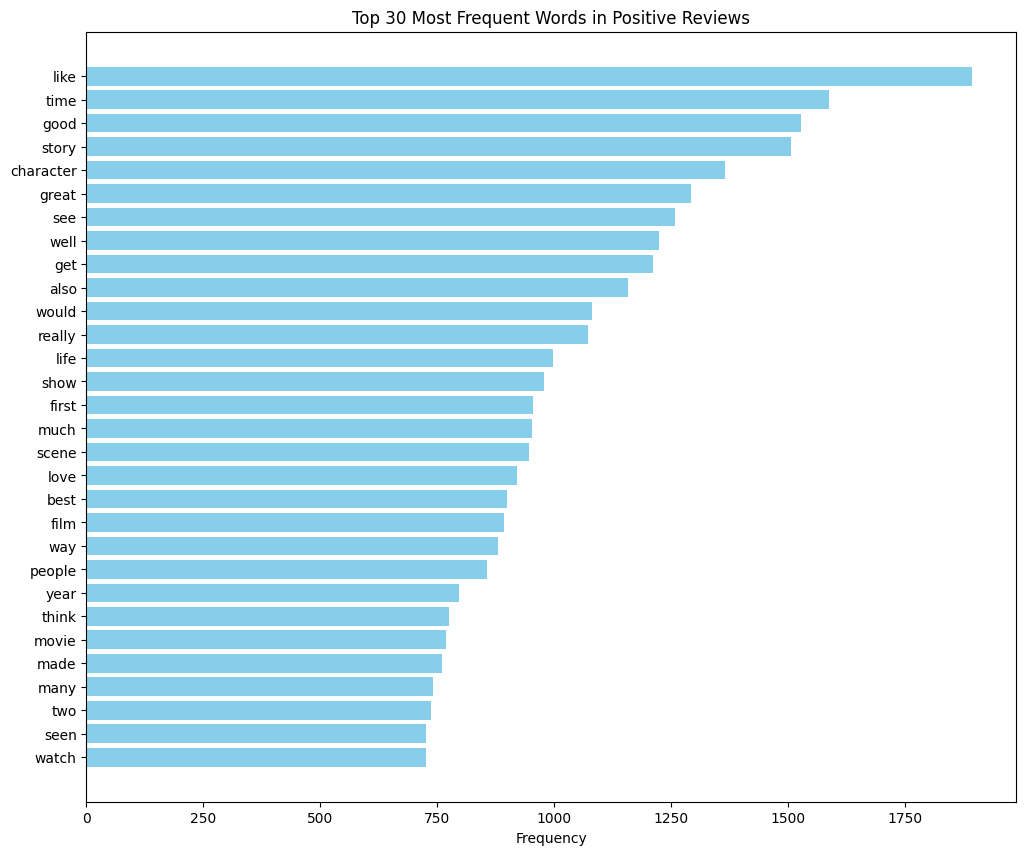

In [26]:
positive_reviews = data[data['label'] == 1]['review_processed']

word_counts = Counter(word_tokenize(' '.join(positive_reviews)))

top_words = word_counts.most_common(30)

words, frequencies = zip(*top_words)
plt.figure(figsize=(12, 10))
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 30 Most Frequent Words in Positive Reviews')
plt.gca().invert_yaxis()
plt.show()


In [29]:
#pip install matplotlib nltk wordcloud


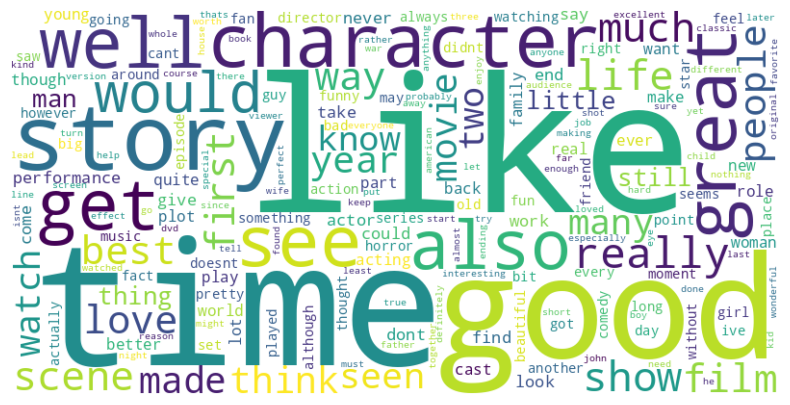

In [32]:
from wordcloud import WordCloud
word_counts = Counter(word_tokenize(' '.join(positive_reviews)))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [33]:
#pip install scikit-learn matplotlib seaborn


In [34]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns

In [35]:
# Vectorize text data
vectorizer = CountVectorizer(max_features=2500)
X = vectorizer.fit_transform(data['review_processed']).toarray()
y = data['label']

In [36]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [37]:
# Train a Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of GaussianNB: {:.2f}%".format(accuracy * 100))


Accuracy of GaussianNB: 72.90%


In [39]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[400  79]
 [192 329]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.84      0.75       479
           1       0.81      0.63      0.71       521

    accuracy                           0.73      1000
   macro avg       0.74      0.73      0.73      1000
weighted avg       0.74      0.73      0.73      1000



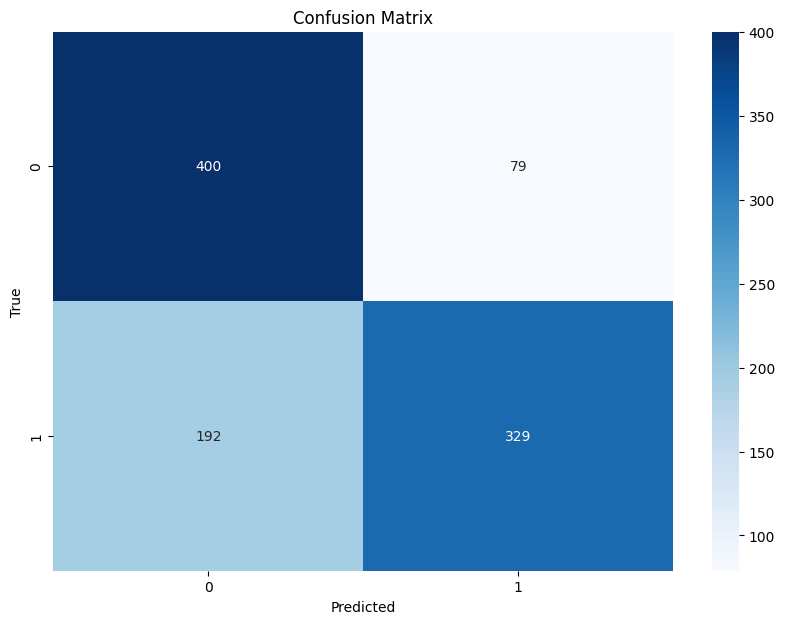

In [40]:
# Visualization using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [41]:
# Logistic Regression with various C values
C_values = [0.01, 0.05, 0.5, 1]
for C in C_values:
    lr = LogisticRegression(C=C, max_iter=1000)
    lr.fit(X_train, y_train)
    print("Accuracy of Logistic Regression with C={}: {:.2f}%".format(C, lr.score(X_test, y_test) * 100))


Accuracy of Logistic Regression with C=0.01: 83.80%
Accuracy of Logistic Regression with C=0.05: 85.30%
Accuracy of Logistic Regression with C=0.5: 84.30%
Accuracy of Logistic Regression with C=1: 83.40%


In [42]:
# ROC Curve for Logistic Regression with C=1
lr = LogisticRegression(C=1, max_iter=1000)
lr.fit(X_train, y_train)
y_scores = lr.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)


In [43]:
roc_auc

0.9014020732572257

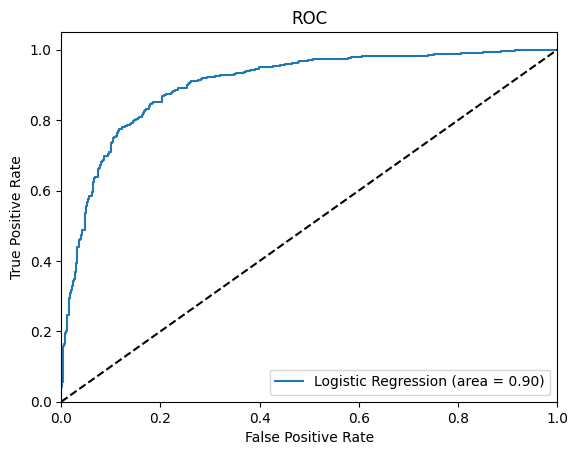

Area under the ROC curve for Logistic Regression: 0.90


In [45]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

print("Area under the ROC curve for Logistic Regression: {:.2f}".format(roc_auc))